# A/B Testing on Marketing Dataset

## Dataset
Marketing A/B Testing Dataset (Source : https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing)

This Dataset is a data where users are divided into 2 groups, namely the Control Group which will see the Ad Basic Template, and the Exposed Group which will see the SmartAd Brand Interactive Ad.

# Objective
Conduct an analysis of both groups to find out whether SmartAd is successful, and whether there is a significant difference between the two groups, and find out the sample size and A/B testing period that should be carried out..

Data Dictionary :

auction_id: Unique ID of User who has been presented with BIO Questionnaire, If viewing but not answering Yes or No, then both Yes and No will be Zero

experiment: User Group, Exposed or Control

control: User who Views Ad Standard Template

exposed: User who Views SmartAd Brand Interactive Ad.

date: Date (YYYY/MM/DD)

hour: Time.

device_make: Device used for access

platform_os: OS ID.

browser: Name of Browser Used.

yes: 1 If User Answers Yes on BIO Questionnaire.

no: 1 If User Answers No on BIO Questionnaire.

### Hypothesis
- Null Hypothesis (H₀): There is no significant influence of Ad on Conversion

- Alternative Hypothesis (H₁): There is a significant influence of Ad on Conversion

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
import seaborn as sns

In [3]:
# Load Dataset
df = pd.read_csv("SmartAd.csv")
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
# Checking the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [5]:
### Checking Missing Value
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [6]:
### Drop Duplicate
len(df.drop_duplicates())/len(df) # 1, TIdak Ada Duplikat

1.0

In [7]:
# Counting Each Group and its Percentage
print(df['experiment'].value_counts())
df['experiment'].value_counts(normalize=True)

experiment
control    4071
exposed    4006
Name: count, dtype: int64


experiment
control    0.504024
exposed    0.495976
Name: proportion, dtype: float64

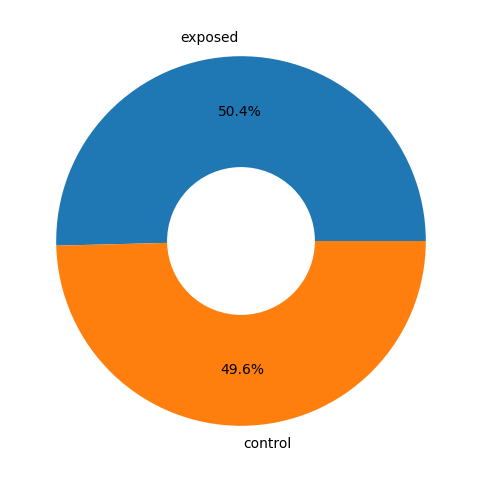

In [8]:
# Making Visualization of the Group

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(df['experiment'].value_counts(), labels=df['experiment'].unique(), autopct='%.1f%%', pctdistance=0.7, wedgeprops=dict(width=0.6))
plt.show()

In [9]:
# Cek Rata - Rata Yang menekan Ad di Kedua Group
df.groupby('experiment')['yes'].mean()

experiment
control    0.064849
exposed    0.076885
Name: yes, dtype: float64

In [10]:
# Dropping All Unique values ​​in Column, Except Device as they are too many and not relevant for analysis
print("Unique categorical values:")
columns = df.columns.drop(['auction_id', 'device_make'])
for column in columns:
    print( column, ": ", df[column].unique())

Unique categorical values:
experiment :  ['exposed' 'control']
date :  ['2020-07-10' '2020-07-07' '2020-07-05' '2020-07-03' '2020-07-09'
 '2020-07-04' '2020-07-06' '2020-07-08']
hour :  [ 8 10  2 15  5  0 14 13  6 16  7 20  4 17  1 19 18  3 23 12  9 11 21 22]
platform_os :  [6 5 7]
browser :  ['Chrome Mobile' 'Chrome Mobile WebView' 'Facebook' 'Mobile Safari'
 'Chrome Mobile iOS' 'Samsung Internet' 'Mobile Safari UI/WKWebView'
 'Chrome' 'Opera Mini' 'Edge Mobile' 'Android' 'Pinterest' 'Opera Mobile'
 'Firefox Mobile' 'Puffin']
yes :  [0 1]
no :  [0 1]


### Interpretation and Determination of Sample Size & Duration
- From the Data, it can be seen that the distribution of the Control Group is almost balanced with Control at 50.4% and Exposed at 49.6%
- The number of Conversions in the Control Group that filled in Yes was 6.48%, while the Conversion Ratio in the Exposed Group was 7.68%

Sample Size and Duration
- In the data, the arrival of Users was recorded for 8 Days, where in those 8 Days there were 8077 Visitors, so it is assumed that there will be 1000 Visitors each day
- Using ABtestguide with a Power of 10%, Control Conversion Rate 6% with Expected Improvement 20% from 6%, Unique Visitors per week 7000
- The Sample Size obtained was 8994 with a Duration of 2.57 Weeks, so to validate the results of this A/B Testing, a Sample Size of 8994 with a Duration of 3 Weeks (Rounded Up) is required

In [11]:
# Values ​​for the T-Test, which answered Yes in both groups
control_group = df[df['experiment'] == 'control']['yes']
exposed_group = df[df['experiment'] == 'exposed']['yes']


In [12]:
# T-Test
t_stat, p_value = ttest_ind(control_group, exposed_group, equal_var=False)

In [13]:
# Showing T-Test Result
print(t_stat)
print(p_value)

-2.107278649715408
0.035124460220699455


In [14]:
if p_value < 0.05:
  print("There is a Significant Difference Between the Group Exposed to SmartAd and the Control Group")
else:
  print("There is NO Significant Difference Between the Group Exposed to SmartAd and the Control Group")

There is a Significant Difference Between the Group Exposed to SmartAd and the Control Group


### Simmary of Analysis
The analysis shows that there is a significant difference between the group exposed to SmartAd and the Control group, so we reject the null hypothesis (H0) and accept the alternative hypothesis (H1).

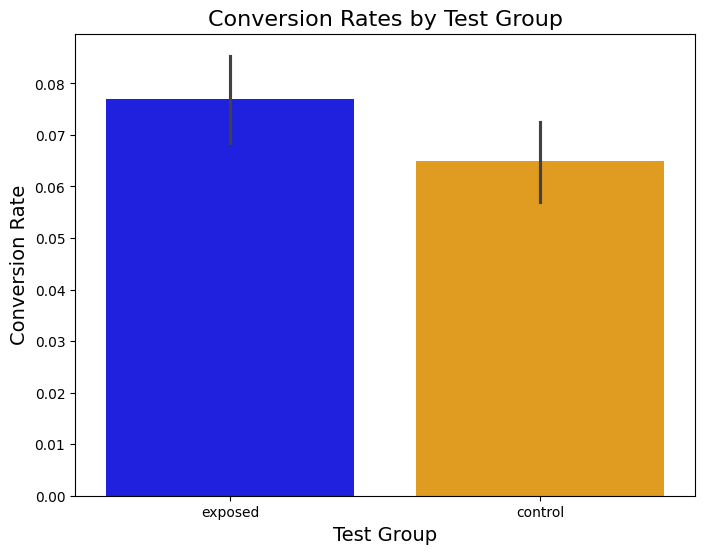

In [15]:
ad_df = df[df['experiment']=='exposed']
plt.figure(figsize=(8, 6))
sns.barplot(x='experiment', y='yes', data=df, hue='experiment', palette=['blue', 'orange'], legend=False)
plt.title('Conversion Rates by Test Group', fontsize=16)
plt.xlabel('Test Group', fontsize=14)
plt.ylabel('Conversion Rate', fontsize=14)
plt.show()

In [16]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


C:\Users\roomr\AppData\Local\Temp\ipykernel_1432\3212706824.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversionRateByDay = df.groupby(['day_of_week', 'experiment'])['yes'].mean()


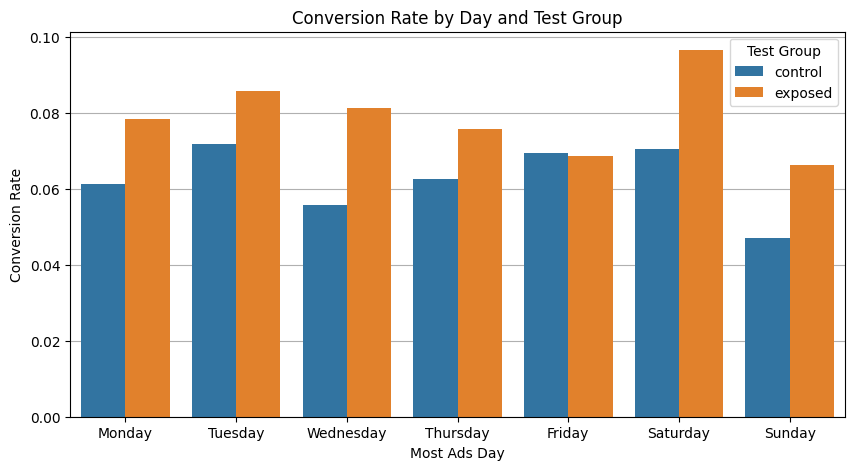

In [17]:
# Konversi Menjadi Date
df['date'] = pd.to_datetime(df['date'])

# Buat Kolum Baru
df['day_of_week'] = df['date'].dt.day_name()

# Sortir Hari
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=ordered_days, ordered=True)

# Konversi tiap Hari
conversionRateByDay = df.groupby(['day_of_week', 'experiment'])['yes'].mean()

dataset_plot = conversionRateByDay.reset_index()

dataset_plot = dataset_plot.sort_values('day_of_week')

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='yes', hue='experiment', data=dataset_plot)
plt.xlabel('Most Ads Day')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Day and Test Group')
plt.legend(title='Test Group')
plt.grid(which='major', axis='y')
plt.gca().set_axisbelow(True)  

plt.show()

It can be seen that the group that received SmartAd had a significantly higher conversion rate compared to the group that only received Basic Ad except on Friday where the Control Group gave a slightly higher Conversion, but on other days the Exposed Group consistently gave a higher Conversion Rate.
In addition, it was found that the most Conversions were obtained on Saturdays for both the Control Group and the Exposed Group.

Thus, companies can allocate more advertising budgets on those days to maximize conversions. In addition, companies can also optimize marketing strategies by adjusting ad schedules during the hours with the highest traffic and testing various ad variations to increase campaign effectiveness.

- Increase the frequency of Ad displays on Monday and Tuesday when engagement is highest.
- Place Ads in strategic locations in applications that users visit more often on those days.
- Implement dynamic Ads that change based on time, preferences, or user activity.
- Send push notifications that direct users to Ads at the right time.
- Analyze interaction patterns with heatmaps or session tracking to see if Ad placement is optimal.